# Data Visualization

In [ ]:
import pandas as pd

df_train = pd.read_csv("/content/Train.csv")
df_train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [ ]:
len(df_train)

8068

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
df_train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [ ]:
df_train.dropna(inplace=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-7-0ca06052e5bb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df_train, ax=axes[0, 0], palette = ["skyblue", "salmon"])
<ipython-input-7-0ca06052e5bb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Graduated", data=df_train, ax=axes[0, 1], palette = ["lightgreen", "red"])
<ipython-input-7-0ca06052e5bb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Ever_Married", data=df_train, ax=axes[1, 0], palette = ["orange", "purple"])
<ipython-input-7-0ca06052e5bb>:17: FutureWarning: 

Passing `palett

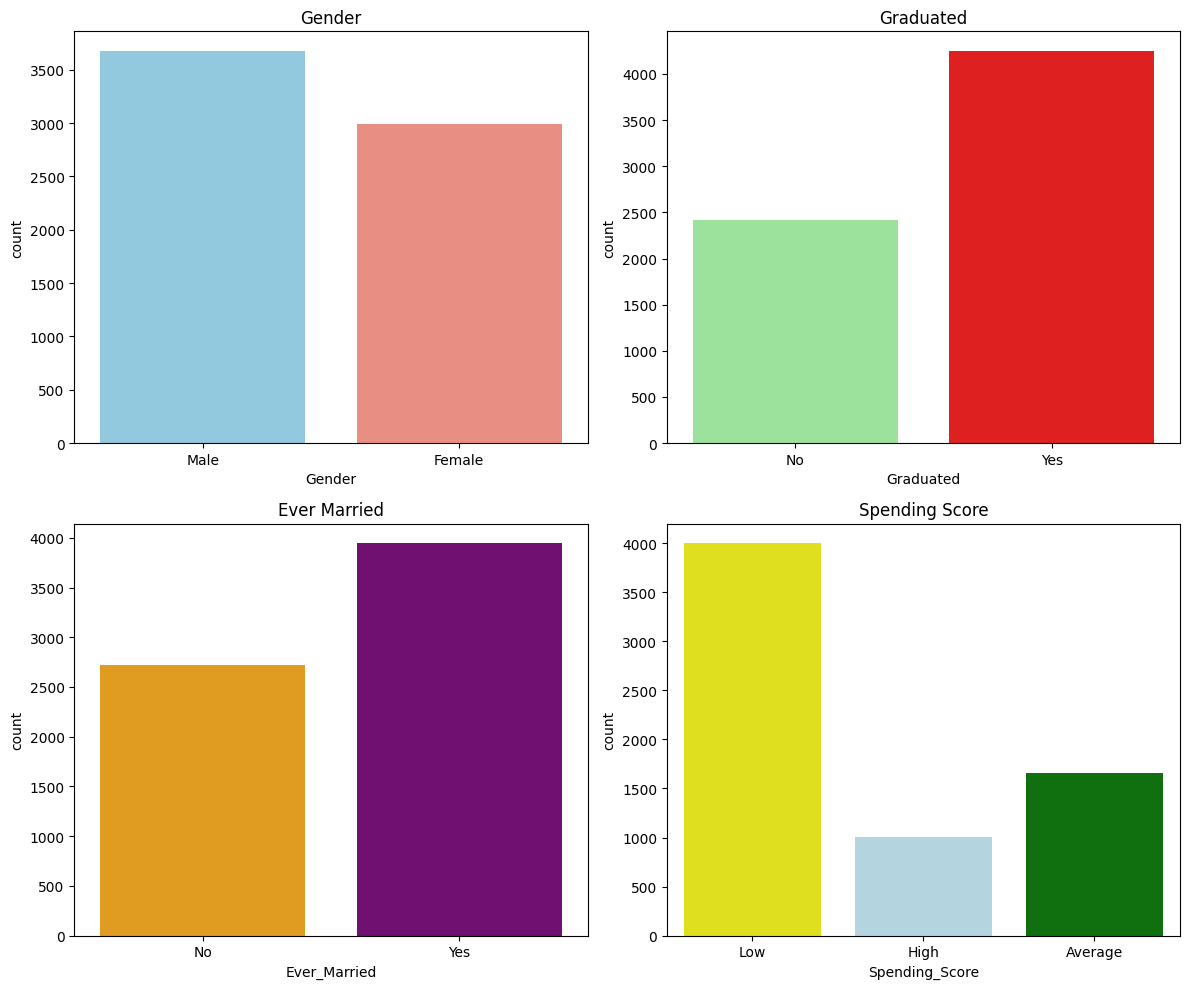

In [ ]:
# Set up the layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot Gender
sns.countplot(x="Gender", data=df_train, ax=axes[0, 0], palette = ["skyblue", "salmon"])
axes[0, 0].set_title('Gender')

# Plot Graduated
sns.countplot(x="Graduated", data=df_train, ax=axes[0, 1], palette = ["lightgreen", "red"])
axes[0, 1].set_title('Graduated')

# Plot Ever_Married
sns.countplot(x="Ever_Married", data=df_train, ax=axes[1, 0], palette = ["orange", "purple"])
axes[1, 0].set_title('Ever Married')

# Plot Spending_Score
sns.countplot(x="Spending_Score", data=df_train, ax=axes[1, 1], palette = ["yellow", "lightblue", 'green'])
axes[1, 1].set_title('Spending Score')

plt.tight_layout()
plt.show()

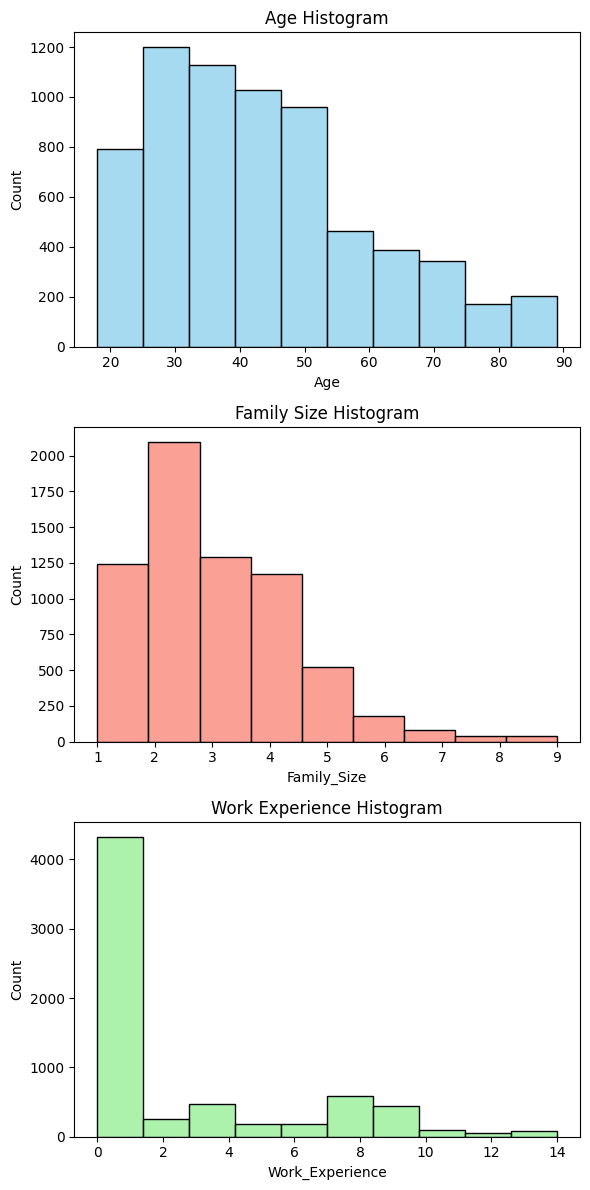

In [ ]:
# Set up the layout
fig, axes = plt.subplots(3,1, figsize=(6, 12))

# Plot histogram for Age
sns.histplot(df_train['Age'], bins=10, ax=axes[0], color='skyblue')
axes[0].set_title('Age Histogram')

# Plot histogram for Family_Size
sns.histplot(df_train['Family_Size'], bins=9, ax=axes[1], color='salmon')
axes[1].set_title('Family Size Histogram')

# Plot histogram for Work_Experience
sns.histplot(df_train['Work_Experience'], bins=10, ax=axes[2], color='lightgreen')
axes[2].set_title('Work Experience Histogram')

plt.tight_layout()
plt.show()

In [ ]:
df_train['Segmentation'].value_counts()

D    1757
C    1720
A    1616
B    1572
Name: Segmentation, dtype: int64

<Axes: xlabel='Segmentation', ylabel='count'>

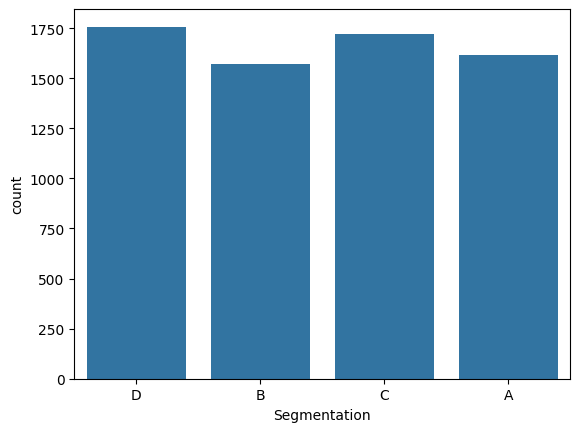

In [ ]:
sns.countplot(x="Segmentation", data=df_train)

In [ ]:
# Adding Age groups to the dataset

bin_edges = [0, 18, 24, 34, 44, 54, 64, 100]
bin_labels = ['Below 18', '19-24', '25-34', '35-44', '45-54', '55-64', '65 and above']

df_train.loc[:,'Age_Groups'] = pd.cut(df_train['Age'], bins=bin_edges, labels=bin_labels, right=False) #right=False ex: age of 18 is included in the 'Below 18' group

<Axes: xlabel='Age_Groups', ylabel='count'>

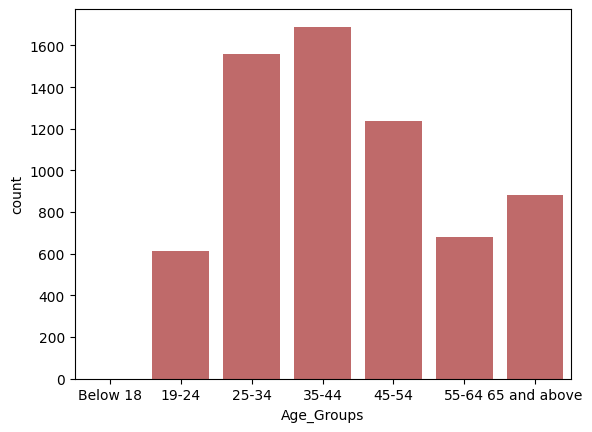

In [ ]:
sns.countplot(x="Age_Groups", data=df_train, color='indianred')

In [ ]:
def plot_stacked_barplots(df, column1, column2, title):
    grouped = df.groupby([column1, column2]).size().unstack()
    ax = grouped.plot(kind='bar', stacked='True', edgecolor='black')

    ax.legend(loc='upper left', bbox_to_anchor=(1,1))

    plt.xlabel(column1)
    plt.ylabel('Count')
    plt.title(title)
    plt.show()
    print()

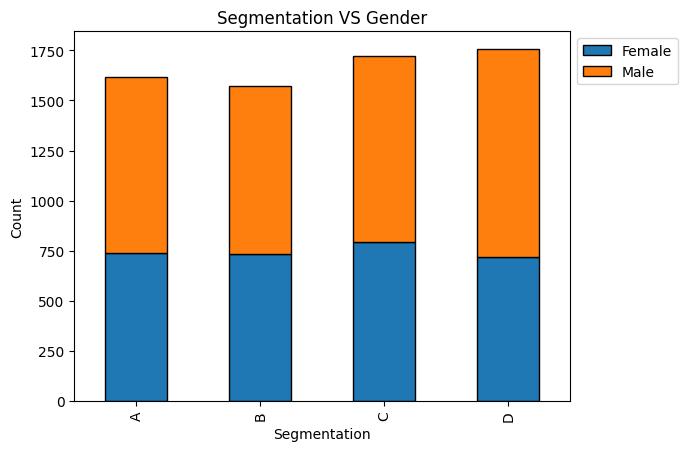

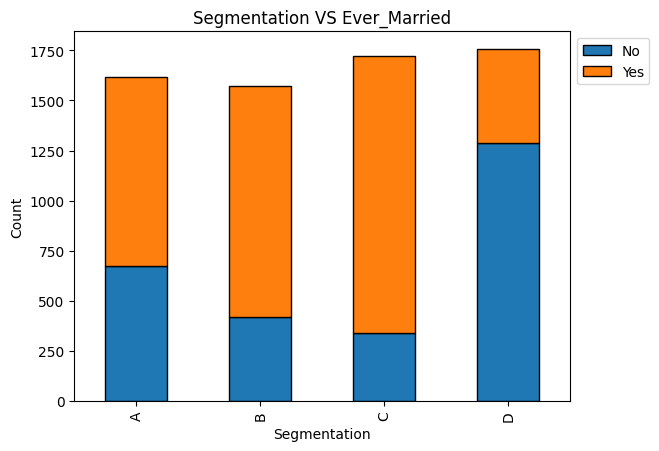

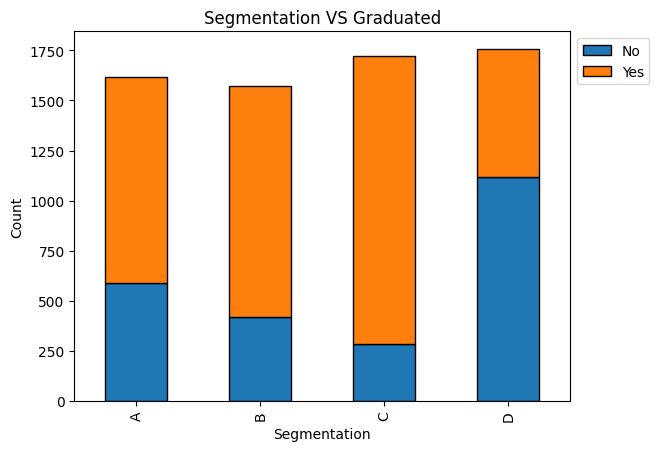

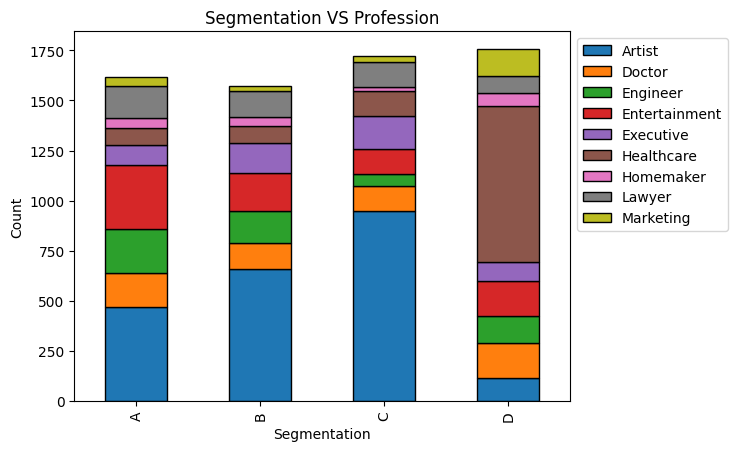

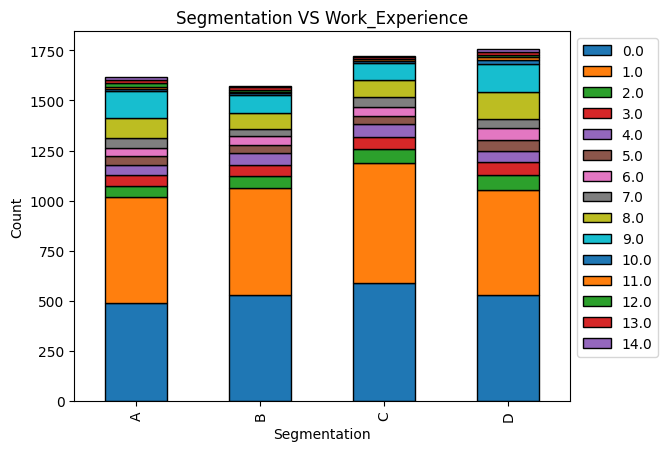

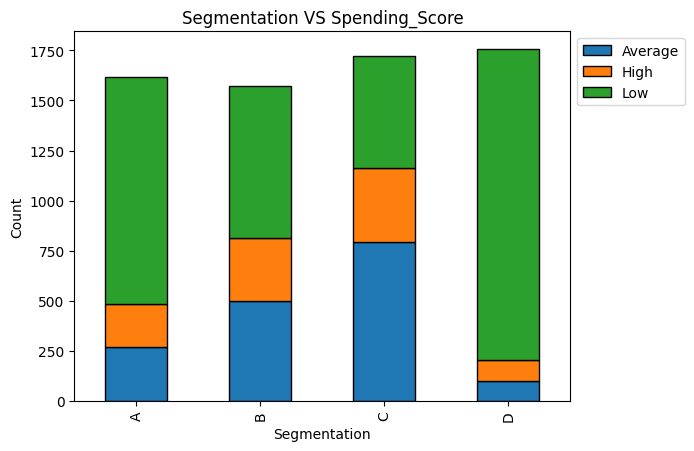

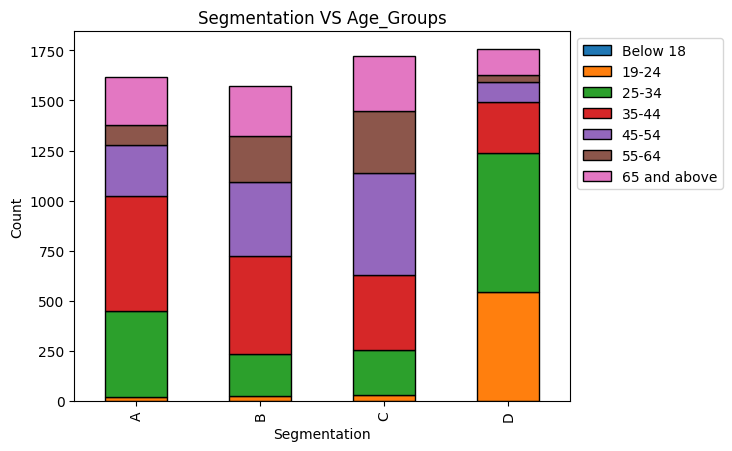

In [ ]:
# Creating plots of Segmentation VS Different Factors
plot_stacked_barplots(df_train, 'Segmentation', 'Gender', 'Segmentation VS Gender')
plot_stacked_barplots(df_train, 'Segmentation', 'Ever_Married', 'Segmentation VS Ever_Married')
plot_stacked_barplots(df_train, 'Segmentation', 'Graduated', 'Segmentation VS Graduated')
plot_stacked_barplots(df_train, 'Segmentation', 'Profession', 'Segmentation VS Profession')
plot_stacked_barplots(df_train, 'Segmentation', 'Work_Experience', 'Segmentation VS Work_Experience')
plot_stacked_barplots(df_train, 'Segmentation', 'Spending_Score', 'Segmentation VS Spending_Score')
plot_stacked_barplots(df_train, 'Segmentation', 'Age_Groups', 'Segmentation VS Age_Groups')